In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

def is_multiple_of_5(lst):
    return len(lst) % 5 == 0

In [3]:
def find_part_with_most_rain_using_cumulative_rainfall(ax, array, n, plot=False):
    # Calculate the differences in array for cumulative rainfall
    array_diff = np.diff(array)
    
    # Split array into n parts
    splits = np.array_split(array_diff, n)
    
    max_array_rainfall = 0
    max_array_num = None
    
    total_precipitations = []  # To store total precipitation for each split
    split_ranges = []  # To store start and end indices for each split
    
    # Calculate total precipitation for each split
    split_start = 0
    for split in splits:
        total_precipitation = split.sum()
        total_precipitations.append(total_precipitation)
        split_end = split_start + len(split)
        split_ranges.append((split_start, split_end))
        if total_precipitation > max_array_rainfall:
            max_array_num = len(total_precipitations)
            max_array_rainfall = total_precipitation
        split_start = split_end
    
    colors = ['lightblue'] * n  # Default color for all splits
    highlight_color = 'yellow'  # Color for the split with the most rainfall
    
    if plot:
        # Plot the array
        ax.plot(range(1, len(array_diff) + 1), array_diff, label='Precipitation', marker='o')
        
        # Add vertical lines and shading for each split segment
        for i, (start_index, end_index) in enumerate(split_ranges):
            color = highlight_color if (i + 1) == max_array_num else colors[i]
            
            # Add vertical lines at the start and end of each split
            ax.axvline(x=start_index + 1, color=color, linestyle='--', label=f'Split {i+1} Start' if i == 0 or (i + 1) == max_array_num else "")
            ax.axvline(x=end_index, color=color, linestyle='--', label=f'Split {i+1} End' if i == 0 or (i + 1) == max_array_num else "")
            
            # Shade the region for the split
            ax.fill_between(range(start_index + 1, end_index + 1), array_diff[start_index:end_index], color=color, alpha=0.3)
            
            # Add the total precipitation value behind the shading
            ax.text((start_index + end_index) / 2+0.5, max(array_diff) * 0.05,  # Adjust y-position if needed
                    f'{total_precipitations[i]:.2f}',
                    ha='center', va='center', fontsize=10, color='black', weight='bold', zorder=1)
        
        ax.set_title(f'Precipitation Values with Splits Marked. Max at {max_array_num}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Precipitation')
    
    return max_array_num   

def find_part_with_most_rain(ax, array, n, plot=False):
    # Compute differences
    # Split the array into 5 equal parts
    splits = np.array_split(array, n)
    
    max_array_rainfall = 0
    max_array_num = None
    
    total_precipitations = []  # To store total precipitation for each split
    split_ranges = []  # To store start and end indices for each split
    
    # Calculate total precipitation for each split
    split_start = 0
    for split in splits:
        total_precipitation = split.sum()
        total_precipitations.append(total_precipitation)
        split_end = split_start + len(split)
        split_ranges.append((split_start, split_end))
        if total_precipitation > max_array_rainfall:
            max_array_num = len(total_precipitations)
            max_array_rainfall = total_precipitation
        split_start = split_end
    
    colors = ['lightblue'] * n  # Default color for all splits
    highlight_color = 'yellow'  # Color for the split with the most rainfall
    
    if plot:
        # Plot the array
        ax.plot(range(1, len(array) + 1), array, label='Precipitation', marker='o')
        
        # Add vertical lines and shading for each split segment
        for i, (start_index, end_index) in enumerate(split_ranges):
            color = highlight_color if (i + 1) == max_array_num else colors[i]
            
            # Add vertical lines at the start and end of each split
            ax.axvline(x=start_index + 1, color=color, linestyle='--', label=f'Split {i+1} Start' if i == 0 or (i + 1) == max_array_num else "")
            ax.axvline(x=end_index, color=color, linestyle='--', label=f'Split {i+1} End' if i == 0 or (i + 1) == max_array_num else "")
            
            # Shade the region for the split
            ax.fill_between(range(start_index + 1, end_index + 1), array[start_index:end_index], color=color, alpha=0.3)
            
            # Add the total precipitation value behind the shading
            ax.text((start_index + end_index) / 2+0.5, max(array) * 0.05,  # Adjust y-position if needed
                    f'{total_precipitations[i]:.2f}',
                    ha='center', va='center', fontsize=10, color='black', weight='bold', zorder=1)
        
        ax.set_title(f'Precipitation Values with Splits Marked. Max at {max_array_num}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Precipitation')

    # return max_array_num

### read in some data

In [4]:
with open(f"/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/UKCP18_30mins/bc005/profiles_df.pkl", 'rb') as f:
    ukcp18_present = pickle.load(f)    

In [5]:
unique_value_counts = ukcp18_present['Loading_profile_normalised_rain'].value_counts()
# Calculate the total number of values in the column
total_count = unique_value_counts.sum()

# Convert counts to percentages
unique_value_percentages = round((unique_value_counts / total_count) * 100,1)

# Display the percentages
print(unique_value_percentages)

F2    30.7
F1    20.3
C     18.6
B1    16.9
B2    13.5
Name: Loading_profile_normalised_rain, dtype: float64


In [6]:
unique_value_counts = ukcp18_present['Loading_profile12'].value_counts()
# Calculate the total number of values in the column
total_count = unique_value_counts.sum()

# Convert counts to percentages
unique_value_percentages = round((unique_value_counts / total_count) * 100,1)

# Display the percentages
print(unique_value_percentages)

F2    32.8
F1    30.3
B1    13.5
B2    12.7
C     10.7
Name: Loading_profile12, dtype: float64


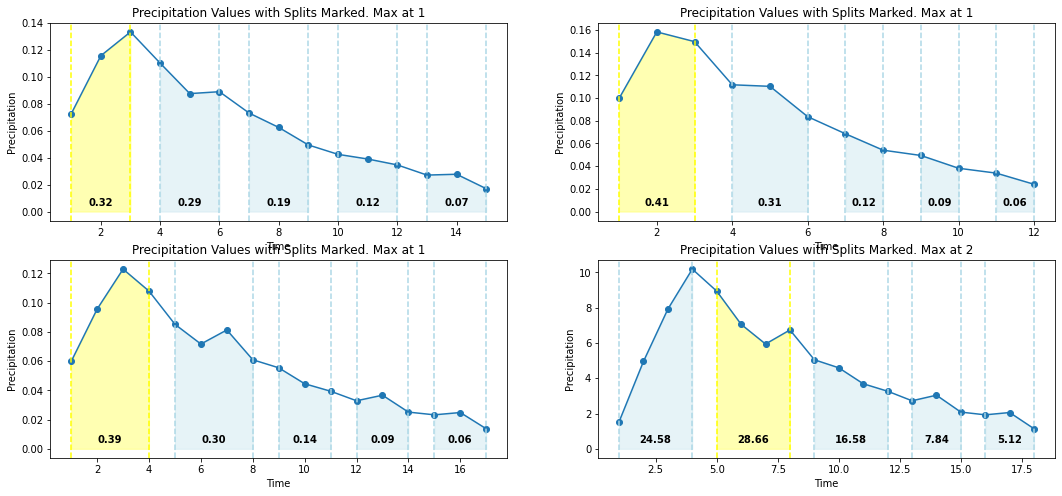

In [7]:
row_num =125249 #47677 #1014
fig,axs=plt.subplots(ncols=2,nrows=2, figsize=(18,8))
find_part_with_most_rain_using_cumulative_rainfall(axs[0,0], ukcp18_present['normalized_interpolated_rainfall_15'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[0,1], ukcp18_present['normalized_interpolated_rainfall_12'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[1,0], ukcp18_present['normalized_rainfall'][row_num], 5, True)
find_part_with_most_rain(axs[1,1], ukcp18_present['precip'][row_num], 5, True)

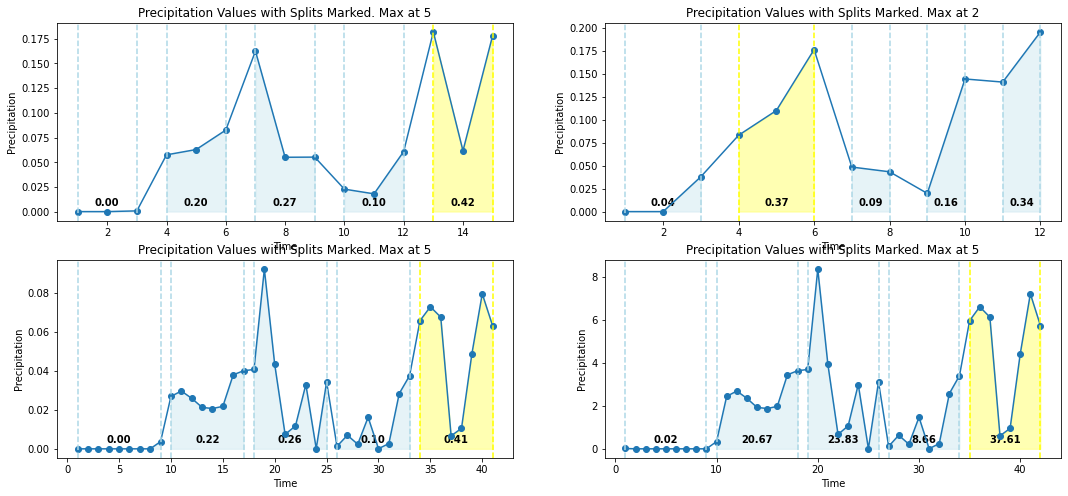

In [8]:
row_num =125220 #125249 #47677 #1014
fig,axs=plt.subplots(ncols=2,nrows=2, figsize=(18,8))
find_part_with_most_rain_using_cumulative_rainfall(axs[0,0], ukcp18_present['normalized_interpolated_rainfall_15'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[0,1], ukcp18_present['normalized_interpolated_rainfall_12'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[1,0], ukcp18_present['normalized_rainfall'][row_num], 5, True)
find_part_with_most_rain(axs[1,1], ukcp18_present['precip'][row_num], 5, True)

# Find column with different answers for raw rain and normalised rain

In [255]:
test = ukcp18_present.loc[~(ukcp18_present['Loading_profile_raw_rain'] == ukcp18_present['Loading_profile_normalised_rain'])]
test

,gauge_num,season,precip,Volume,Year,duration,normalized_rainfall,normalized_interpolated_rainfall_12,normalized_interpolated_rainfall_15,max_quintile_profile_12,max_quintile_profile_15,max_quintile_normalised_rain,max_quintile_raw_rain,Loading_profile12,Loading_profile15,Loading_profile_normalised_rain,Loading_profile_raw_rain
1,0,None,"[11.419875, 18.518131]",29.938006,2003,None,None,None,None,None,None,None,2,NaN,NaN,NaN,F1
5,0,Summer,"[0.022410147, 26.165455, 12.192257, 4.074276]",42.454398,2011,2.0,"[0.0005278639664706587, 0.616846929647277, 0.9...","[0.0005278639664706587, 0.15460763038667227, 0...","[0.0005278639664706587, 0.12379167710263193, 0...",1,1,1,2,F2,F2,F2,F1
8,0,Summer,"[0.18367282, 24.325401, 10.816246, 3.8930163, ...",40.911170,2015,2.5,"[0.004489551873246572, 0.5990802464954778, 0.8...","[0.004489551873246572, 0.20268645008065694, 0....","[0.004489551873246572, 0.16304707043917488, 0....",1,1,1,2,F2,F2,F2,F1
9,0,None,"[7.161871, 23.885841]",31.047712,2016,None,None,None,None,None,None,None,2,NaN,NaN,NaN,F1
10,0,None,"[19.53315, 32.854256]",52.387406,2017,None,None,None,None,None,None,None,2,NaN,NaN,NaN,F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125233,1292,None,"[27.074415, 9.738306]",36.812721,2017,None,None,None,None,None,None,None,1,NaN,NaN,NaN,F2
125234,1292,Winter,"[2.4598923, 2.6167872, 1.1992707, 1.7478828, 2...",77.332117,2018,9.0,"[0.03180945250963381, 0.06564775029454807, 0.0...","[0.03180945250963381, 0.07210943975852807, 0.0...","[0.03180945250963381, 0.06771549092302168, 0.0...",3,4,4,3,C,B1,B1,C
125237,1292,Winter,"[1.6395338, 2.4576528, 3.5461824, 7.0895786, 4...",57.416555,2007,10.5,"[0.02855507076073055, 0.07135897612047828, 0.1...","[0.02855507076073055, 0.11253388790026075, 0.2...","[0.02855507076073055, 0.09194643201036952, 0.2...",2,2,2,1,F1,F1,F1,F2
125240,1292,Summer,"[0.014630473, 15.257027, 7.6763325, 6.326579, ...",59.123653,2012,4.0,"[0.00024745549775037997, 0.2583003024888208, 0...","[0.00024745549775037997, 0.1507782829092081, 0...","[0.00024745549775037997, 0.12067211742691657, ...",1,1,1,3,F2,F2,F2,C


## Hmm

These plots are all plotting non-cumulative rainfall, but in all of the normalised/interpolated ones the first low values has been lost.

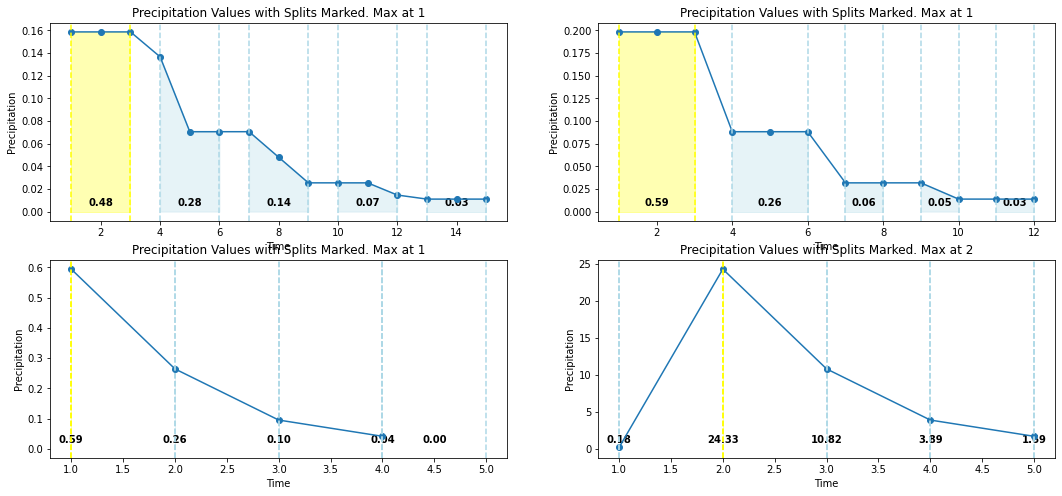

In [19]:
row_num =8 #125249 #47677 #1014
fig,axs=plt.subplots(ncols=2,nrows=2, figsize=(18,8))
find_part_with_most_rain_using_cumulative_rainfall(axs[0,0], test_div5['normalized_interpolated_rainfall_15'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[0,1], test_div5['normalized_interpolated_rainfall_12'][row_num], 5, True)
find_part_with_most_rain_using_cumulative_rainfall(axs[1,0], test_div5['normalized_rainfall'][row_num], 5, True)
find_part_with_most_rain(axs[1,1], test_div5['precip'][row_num], 5, True)

### Raw rainfall has 5 values, the second value is the biggest, so this should definitely be F1

In [256]:
def create_normalised_event(rainfall):
    # Check if the input array is empty or the last value is zero
    if len(rainfall) == 0 or rainfall[-1] == 0:
        print("Empty array or total rainfall is zero. Cannot normalize.")
        return rainfall  # Return the input as-is, or handle appropriately

    # Normalize cumulative rainfall from 0 to 1
    normalized_rainfall = rainfall / rainfall[-1]

    # Debug prints to check the input and output
    print(f"Original rainfall: {rainfall}")
    print(f"Normalized rainfall: {normalized_rainfall}")

    return normalized_rainfall


def create_normalised_event(rainfall):
    # Check if the input array is empty or the maximum value is zero
    if len(rainfall) == 0 or np.max(rainfall) == 0:
        print("Empty array or maximum rainfall is zero. Cannot normalize.")
        return rainfall  # Return the input as-is, or handle appropriately

    # Normalize rainfall from 0 to 1 using the maximum value
    normalized_rainfall = rainfall / np.max(rainfall)

    # Debug prints to check the input and output
    print(f"Original rainfall: {rainfall}")
    print(f"Normalized rainfall: {normalized_rainfall}")

    return normalized_rainfall

def create_cumulative_event(rainfall):
    
    # Calculate cumulative rainfall
    cumulative_rainfall = np.cumsum(rainfall)
    
    return cumulative_rainfall

def interpolate_rainfall(rainfall, bin_number):

    # Define target points for 12 bins
    target_points = np.linspace(0, 1, bin_number)
    
    # Create interpolation function based on existing data points
    rainfall_times = np.array(range(0, len(rainfall)))

    # Normalize time from 0 to 1
    normalized_time = (rainfall_times - rainfall_times[0]) / (rainfall_times[-1] - rainfall_times[0])
    interpolation_func = interp1d(normalized_time, rainfall, kind='linear', fill_value="extrapolate")
    
    # Interpolate values at target points
    interpolated_values = interpolation_func(target_points)
    
    return interpolated_values


def create_incremental_event(cumulative_rainfall):
    
    raw_rainfall = np.diff(cumulative_rainfall, prepend=0)
    raw_rainfall[0] = cumulative_rainfall[0]
    return raw_rainfall
    

from scipy.interpolate import interp1d
raw_rainfall = test['precip'][125234]
normalised_rainfall = create_normalised_event(raw_rainfall)
cumulative_normalised_rainfall = create_cumulative_event(normalised_rainfall)
interpolated15_cumulative_normalised_rainfall = interpolate_rainfall(cumulative_normalised_rainfall,15)
interpolated12_cumulative_normalised_rainfall = interpolate_rainfall(cumulative_normalised_rainfall,12)
interpolated15_incremental_normalised_rainfall = create_incremental_event(interpolated15_cumulative_normalised_rainfall)
interpolated12_incremental_normalised_rainfall = create_incremental_event(interpolated12_cumulative_normalised_rainfall)

incremental_normalised_rainfall = create_incremental_event(cumulative_normalised_rainfall)

Original rainfall: [ 2.4598923  2.6167872  1.1992707  1.7478828  2.4653873  3.5724664
  3.9335742  1.7859752  4.3048525  8.926413   7.252987   7.71839
 10.031792   9.888669   4.7242937  1.913666   1.6629775  1.1268401]
Normalized rainfall: [0.24520966 0.26084943 0.11954701 0.17423435 0.24575742 0.35611448
 0.39211082 0.17803152 0.42912099 0.88981241 0.72300014 0.76939295
 1.         0.98573306 0.47093218 0.19076014 0.16577073 0.1123269 ]


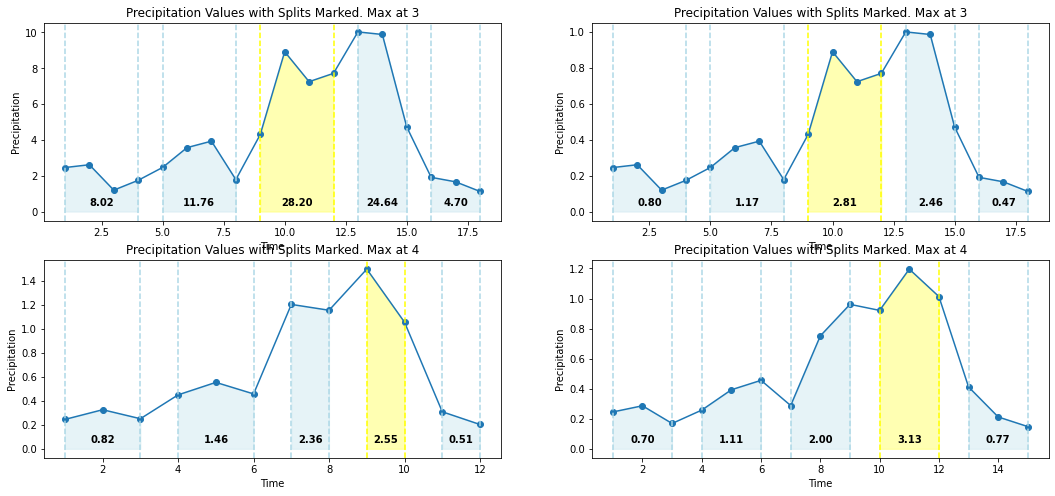

In [257]:
fig,axs=plt.subplots(ncols=2,nrows=2, figsize=(18,8))
find_part_with_most_rain(axs[0,0], raw_rainfall, 5, True)
find_part_with_most_rain(axs[0,1], normalised_rainfall, 5, True)
find_part_with_most_rain(axs[1,0], interpolated12_incremental_normalised_rainfall, 5, True)
find_part_with_most_rain(axs[1,1], interpolated15_incremental_normalised_rainfall, 5, True)


In [ ]:
### Why are we calculating cumulative rainfall?
### Why are we normalising rainfall 0-1?
# Can we interpolate rainfall without doing these things?